# Churn case

In this notebook, you will work on a Churn case that was originally posed as a challenge by Maven Analytics, see [here](https://www.mavenanalytics.io/blog/maven-churn-challenge).

The dataset can be downloaded [here](https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip), or from Kaggle [here](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/data), and from moodle. The dataset contains 3 files:
* The *telecom_customer_churn.csv* file contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022. Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!
* The *telecom_zipcode_population.csv* file contains complimentary information on the estimated populations for the California zip codes in the Customer Churn table
* The *telecom_data_dictionary.csv* file contains metadata about the other two files in the sense of a dictionary of the variables in the two other files

We will ignore the Zip code file for simplicity.

The goal according to the Maven Churn Challenge is to *"help the company improve retention by identifying high value customers and churn risks, and have been asked to present your findings to the CMO in the form of a single page report or dashboard."* [(Maven Churn Challenge, 2022)](https://www.mavenanalytics.io/blog/maven-churn-challenge).

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Task 1

Load in the churn dataset from the file "telecom_customer_churn.csv" and investigate what variables there are in the data. (You might want to look up the data dictionary file to understand what the different variables mean.)

In [85]:
df = pd.read_csv("telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### Task 2

Reflect on the business question and to what extent the data can help us answer the business question.

The dataset has many valuable features that can tell us more about the customers. We essentially want to find those that are "loyal". Some people just accept offer because it's cheap and then they leave again. So quetions become apparent: Do they refund often, how many have they refered, how many are there in their household etc. Another interesting feature could be how many products the customer is subscribed to. Do they also have internet? The task in particular becomes to find those features that are most relevant and telling, but definetely the data can help.

### Task 3

Decide on a way to measure how valuable a customer is. Do some exploratory data analysis of the relevant variables.

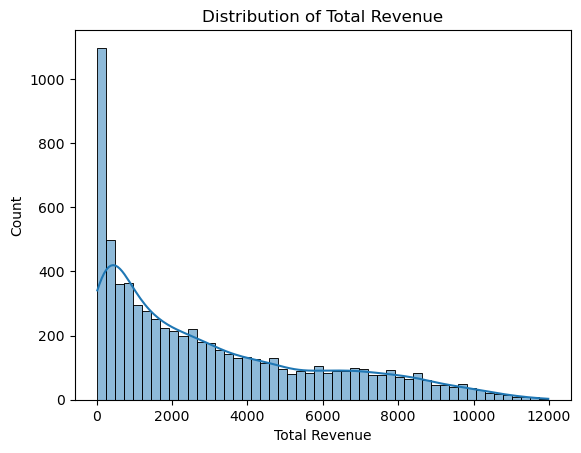

In [86]:
sns.histplot(df['Total Revenue'], bins=50, kde=True)  
plt.title("Distribution of Total Revenue")  
plt.show()


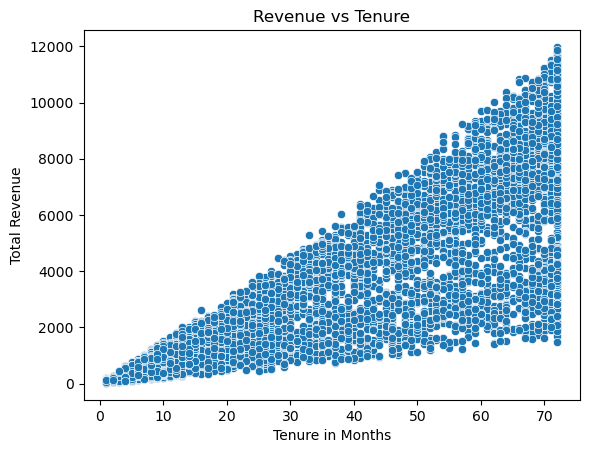

In [87]:
sns.scatterplot(x='Tenure in Months', y='Total Revenue', data=df)  
plt.title("Revenue vs Tenure")  
plt.show()


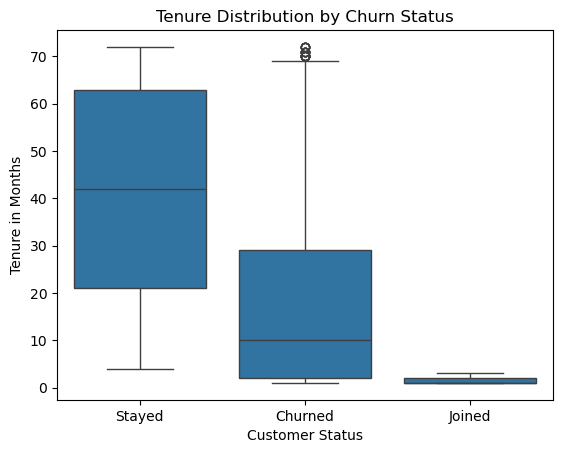

In [88]:
sns.boxplot(x='Customer Status', y='Tenure in Months', data=df)  
plt.title("Tenure Distribution by Churn Status")  
plt.show()


In [89]:
df['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

In [90]:
df['Total Revenue'].describe()

count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64

In [91]:
df['Customer Status'].value_counts(normalize=True)

Customer Status
Stayed     0.670169
Churned    0.265370
Joined     0.064461
Name: proportion, dtype: float64

A lot of people churn due to competitor

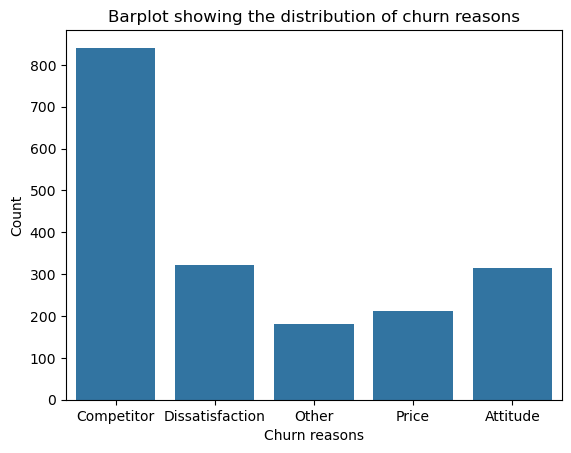

In [92]:
sns.countplot(x = "Churn Category", data = df)
plt.title("Barplot showing the distribution of churn reasons")
plt.xlabel("Churn reasons")
plt.ylabel("Count")
plt.show()

But when reason is due to dissatisfaction, number of referals seems to be higher

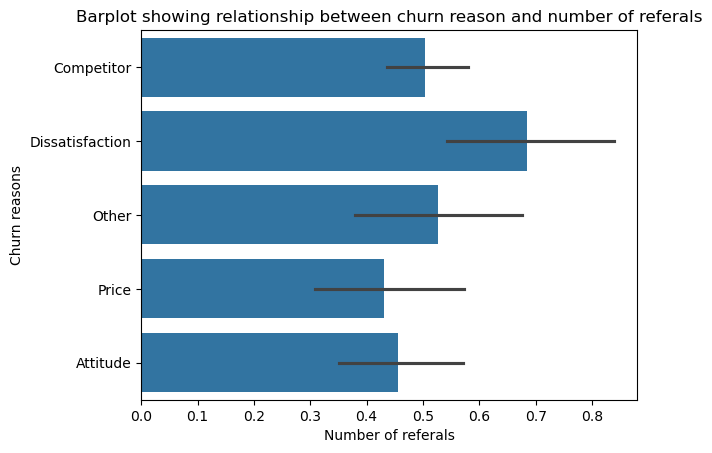

In [93]:
sns.barplot(y = "Churn Category", x="Number of Referrals", data = df)
plt.title("Barplot showing relationship between churn reason and number of referals")
plt.xlabel("Number of referals")
plt.ylabel("Churn reasons")
plt.show()

When going to other competitor, number of referals being 0 is a bigger portion

<Axes: xlabel='Churn Category'>

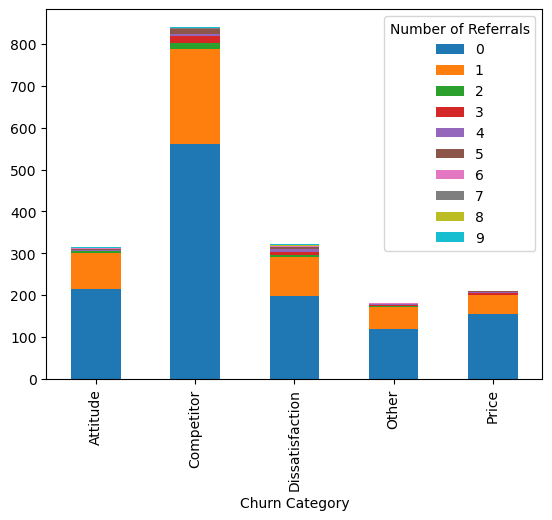

In [94]:
pd.crosstab(df["Churn Category"], df["Number of Referrals"]).plot(kind="bar", stacked=True)

Monthly price doesn't seem to affect the churn rate, due to competitor that much:

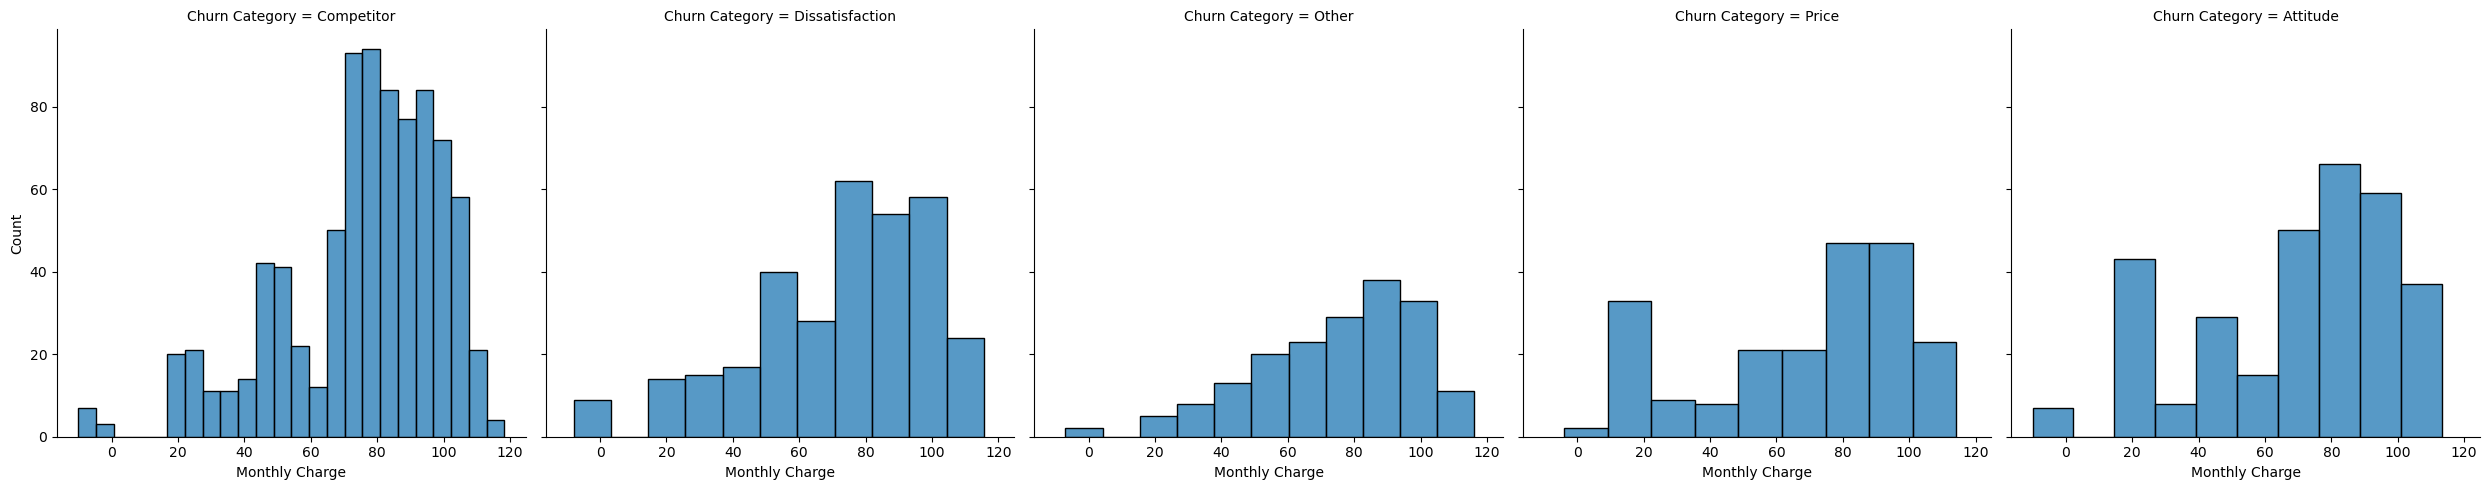

In [95]:
g=sns.FacetGrid(df, col="Churn Category", height = 5)
g.map(sns.histplot, "Monthly Charge")

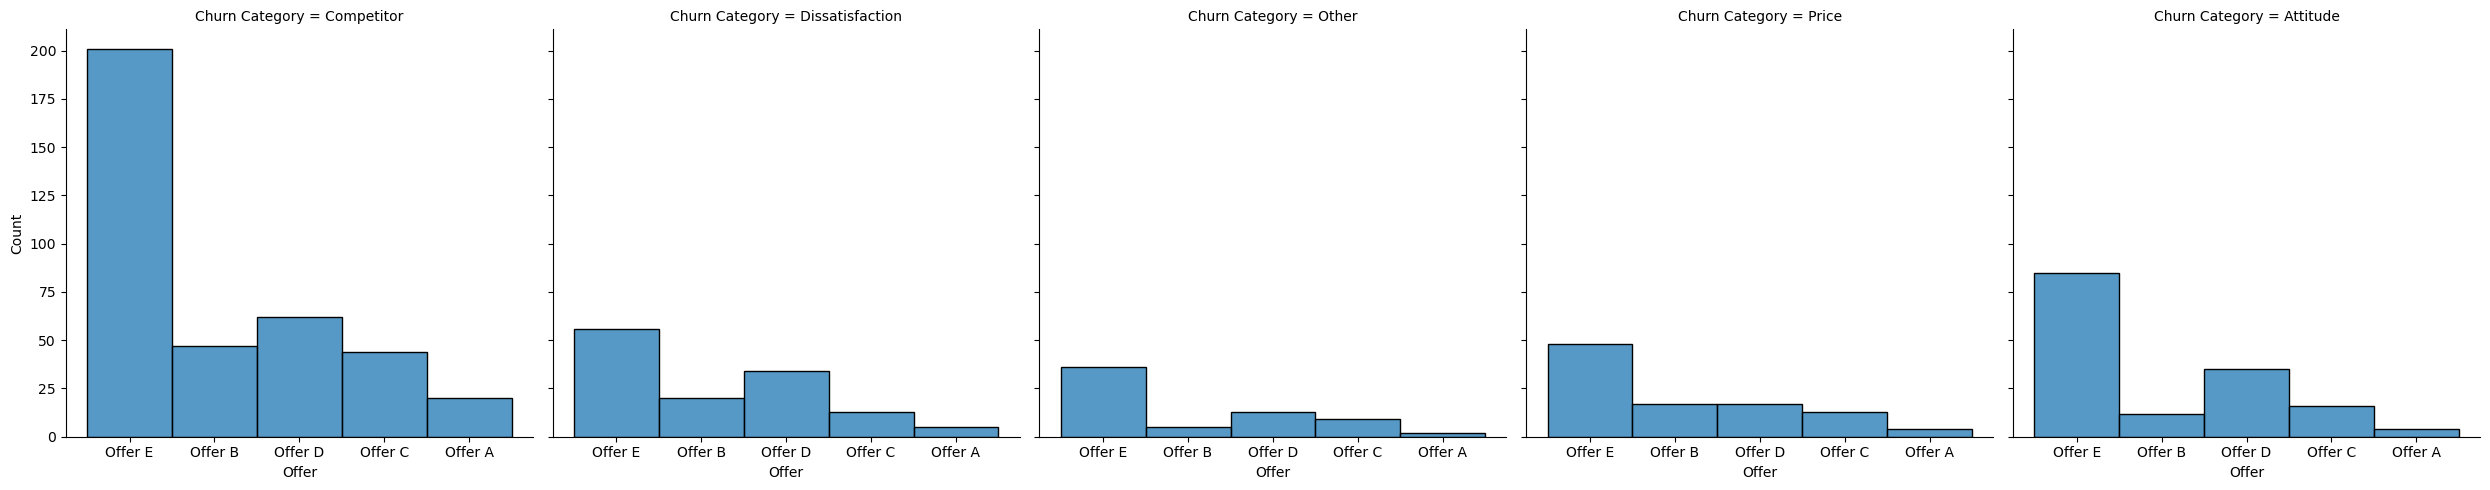

In [96]:
g=sns.FacetGrid(df, col="Churn Category", height = 5)
g.map(sns.histplot, "Offer")

### Task 4

There are a lot of variables, so it makes sense to select only some of them as potential feature variables for making a predictive model for churn. Decide on a good portion of variables potentially to be used in a predictive model of churn.

In [97]:
selected_features_numerical = [
"Age",
"Number of Referrals",
"Tenure in Months",
"Total Revenue",]

In [98]:
selected_features_categorical = [
"Gender",
"Phone Service",
"Multiple Lines",
"Internet Service",
"Customer Status"]

In [99]:
df_corr = df[selected_features_categorical].describe()
df_corr

,Gender,Phone Service,Multiple Lines,Internet Service,Customer Status
count,7043,7043,6361,7043,7043
unique,2,2,2,2,3
top,Male,Yes,No,Yes,Stayed
freq,3555,6361,3390,5517,4720


All cats: "CustomerID",
"Gender",
"Age",
"Married",
"Number of Dependents",
"City",
"Zip Code",
"Latitude",
"Longitude",
"Number of Referrals",
"Tenure in Months",
"Offer",
"Phone Service",
"Avg Monthly Long Distance Charges",
"Multiple Lines",
"Internet Service",
"Internet Type",
"Avg Monthly GB Download",
"Online Security",
"Online Backup",
"Device Protection Plan",
"Premium Tech Support",
"Streaming TV",
"Streaming Movies",
"Streaming Music",
"Unlimited Data",
"Contract",
"Paperless Billing",
"Payment Method",
"Monthly Charge",
"Total Charges",
"Total Refunds",
"Total Extra Data Charges",
"Total Long Distance Charges",
"Total Revenue",
"Customer Status",
"Churn Category",
"Churn Reason",
"Zip Code",
"Population"

### Task 5

Do exploratory data analysis of the target variable. Anything in particular to be aware of?

Theres the cat "joined", we don't want that. Because people can be "i binding i 6 måneder"

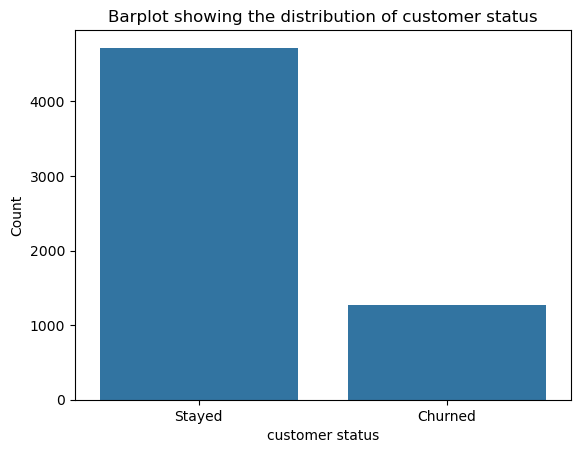

In [110]:
sns.countplot(x = "Customer Status", data = df)
plt.title("Barplot showing the distribution of customer status")
plt.xlabel("customer status")
plt.ylabel("Count")
plt.show()

### Task 6

Do an exploratory analysis of the feature variable decided upon in Task 4.

In [101]:
df[selected_features_numerical].corr()



,Age,Number of Referrals,Tenure in Months,Total Revenue
Age,1.000000,-0.025141,0.009927,0.048265
Number of Referrals,-0.025141,1.000000,0.326975,0.261853
Tenure in Months,0.009927,0.326975,1.000000,0.853146
Total Revenue,0.048265,0.261853,0.853146,1.000000


In [102]:
df[selected_features_categorical].value_counts()



Gender  Phone Service  Multiple Lines  Internet Service  Customer Status
Female  Yes            Yes             Yes               Stayed             884
Male    Yes            Yes             Yes               Stayed             869
                       No              Yes               Stayed             647
Female  Yes            No              Yes               Stayed             615
Male    Yes            No              No                Stayed             462
Female  Yes            No              No                Stayed             446
Male    Yes            Yes             Yes               Churned            428
Female  Yes            Yes             Yes               Churned            412
                       No              Yes               Churned            391
Male    Yes            No              Yes               Churned            355
Female  Yes            Yes             No                Stayed             163
Male    Yes            Yes             No      

The combination of Multiple lines and internet service can result in few cases 

### Task 7

Deal with missing values among the chosen feature variables.

In [103]:
df[selected_features_numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  7043 non-null   int64  
 1   Number of Referrals  7043 non-null   int64  
 2   Tenure in Months     7043 non-null   int64  
 3   Total Revenue        7043 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 220.2 KB


In [104]:
df[selected_features_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            7043 non-null   object
 1   Phone Service     7043 non-null   object
 2   Multiple Lines    6361 non-null   object
 3   Internet Service  7043 non-null   object
 4   Customer Status   7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


In [105]:
df[selected_features_categorical] = df[selected_features_categorical].fillna(method='ffill')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_14944\1537538673.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[selected_features_categorical] = df[selected_features_categorical].fillna(method='ffill')


In [106]:
df[selected_features_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            7043 non-null   object
 1   Phone Service     7043 non-null   object
 2   Multiple Lines    7043 non-null   object
 3   Internet Service  7043 non-null   object
 4   Customer Status   7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


### Task 8

Do relevant data transformation to the target variable.

In [107]:
df = df[df["Tenure in Months"] > 3]

### Task 9

Turn all the categorical variables into dummy variables.

In [112]:
# Combine categorical and numerical features
selected_features = selected_features_categorical + selected_features_numerical

# Select only the desired columns
X_combined = df[selected_features]

# Apply pd.get_dummies to the categorical features
X_combined = pd.get_dummies(X_combined, columns=selected_features_categorical, drop_first=True, dtype=int)


### Task 10 

Create the final X feature set and the final y target variable. Make sure that 1 means Churned and 0 means Stayed. Also create a train-test split of dataset (leaving 20% for test).

In [113]:
y = df["Customer Status"]

In [115]:
y = y.replace({"Stayed": 0, "Churned": 1})

C:\Users\Jacob\AppData\Local\Temp\ipykernel_14944\643051649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"Stayed": 0, "Churned": 1})


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

### Task 11

Decide on how to evaluate the churn prediction model. That is, decide what machine learning performance measure(s) to evaluate your model on, but also think about whether you want to calculate additional things to evaluate the models from a business perspective.

All of them

### Task 12

Train a quick baseline model to predict churn, that can be used for comparison for all future models. For this, use a multiple logistic regression. Use cross-validation to get an unbiased estimate of the model's accuracy on new unseen data. Finally, plot the model's confusion matrix.

### Task 13

The code below creates under-sampled versions of the training data (`_us`) and over-sampled versions of the training data (`_os`). Use these two new pair of training data to retrain logic regression models. It assumes that you have created a train-test split such that the training target variable is called `y_train` and that it takes values 0 and 1, where 1 means "Churned".

In [ ]:
from sklearn.utils import resample

minority_class_index = y_train[y_train == 1].index ##We get the index, because the train/test split puts data in random order, but the index still same
majority_class_index = y_train[y_train == 0].index

In [ ]:
# Under-sampling the majority class
under_sample_index = resample(majority_class_index, replace=False, n_samples=len(minority_class_index), random_state=42)
under_sample_indexes = under_sample_index.union(minority_class_index)

In [ ]:
X_train_us = X_train.loc[under_sample_indexes, :]
y_train_us = y_train[under_sample_indexes]
print("X_train_us shape:", X_train_us.shape)
print("y_train_us shape:", y_train_us.shape)

In [ ]:
# Over-sampling the minority class
over_sample_index = resample(minority_class_index, replace=True, n_samples=len(majority_class_index), random_state=42)
over_sample_indexes = over_sample_index.union(majority_class_index)

In [ ]:
X_train_os = X_train.loc[over_sample_indexes, :]
y_train_os = y_train[over_sample_indexes]
print("X_train_os shape:", X_train_os.shape)
print("y_train_os shape:", y_train_os.shape)

### Task 14

Train a K-Nearest Neighbor classifier for the over-sampled data. Remember to use cross-validation to get a good estimate of what K to chose.

### Task 15

Evaluate the logistic regression and K-Nearest Neighbor on all the relevant metrics (as discussed in Task 11), including at least one business metric.

### Example of hyper-parameter tuning with cross validation

In this example, we will train a Random Forest model and do some grid search together with cross-validation, to find an optimal model. Note that, the parameter grid is just chosen to make an example, it is not guaranteed to be the best grid of parameters for this model.

In [ ]:
param_grid = [
  {"n_estimators": [400, 600, 800],
   "max_depth":  [4, 8, 12],
   "min_samples_leaf": [5, 10]}
 ]

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv = 5, scoring = "accuracy")

In [ ]:
gs_out = grid_search.fit(X_train_os, y_train_os)
gs_out

In [ ]:
gs_out.best_estimator_

In [ ]:
gs_out.best_score_

In [ ]:
gs_out.best_params_

### Task 16

Now, train various tree-based models such as decision trees, Random Forest, AdaBoost, and XGBoost. Remember to use Cross-validation and hyper-parameter tuning, to get the best models.